In [6]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [7]:
traindata = pd.read_csv('train.csv')
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
traindata.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [9]:
# Extract only the variables (columns) of type Integer (int64), and store as a new Pandas DataFrame.

int_columns = traindata.select_dtypes(include = ['int64'])
int_df = pd.DataFrame(int_columns)
int_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
# Drop non-Numeric variables form the DataFrame to have a clean DataFrame with Numeric variables
columns_to_remove = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFinSF2']

# Drop the specified columns
cleaned_int_df = int_df.drop(columns=columns_to_remove)

cleaned_int_df.head()

,Id,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,8450,2003,2003,706,150,856,856,854,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,9600,1976,1976,978,284,1262,1262,0,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,11250,2001,2002,486,434,920,920,866,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,9550,1915,1970,216,540,756,961,756,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,14260,2000,2000,655,490,1145,1145,1053,0,...,192,84,0,0,0,0,0,12,2008,250000


In [12]:
# Find the Summary Statistics (Mean, Median, Quartiles, etc) of SalePrice from the Numeric DataFrame

cleaned_int_df.describe()

,Id,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,1971.267808,1984.865753,443.639726,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,9981.264932,30.202904,20.645407,456.098091,441.866955,438.705324,386.587738,436.528436,48.623081,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,7553.500000,1954.000000,1967.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,9478.500000,1973.000000,1994.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,11601.500000,2000.000000,2004.000000,712.250000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,215245.000000,2010.000000,2010.000000,5644.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


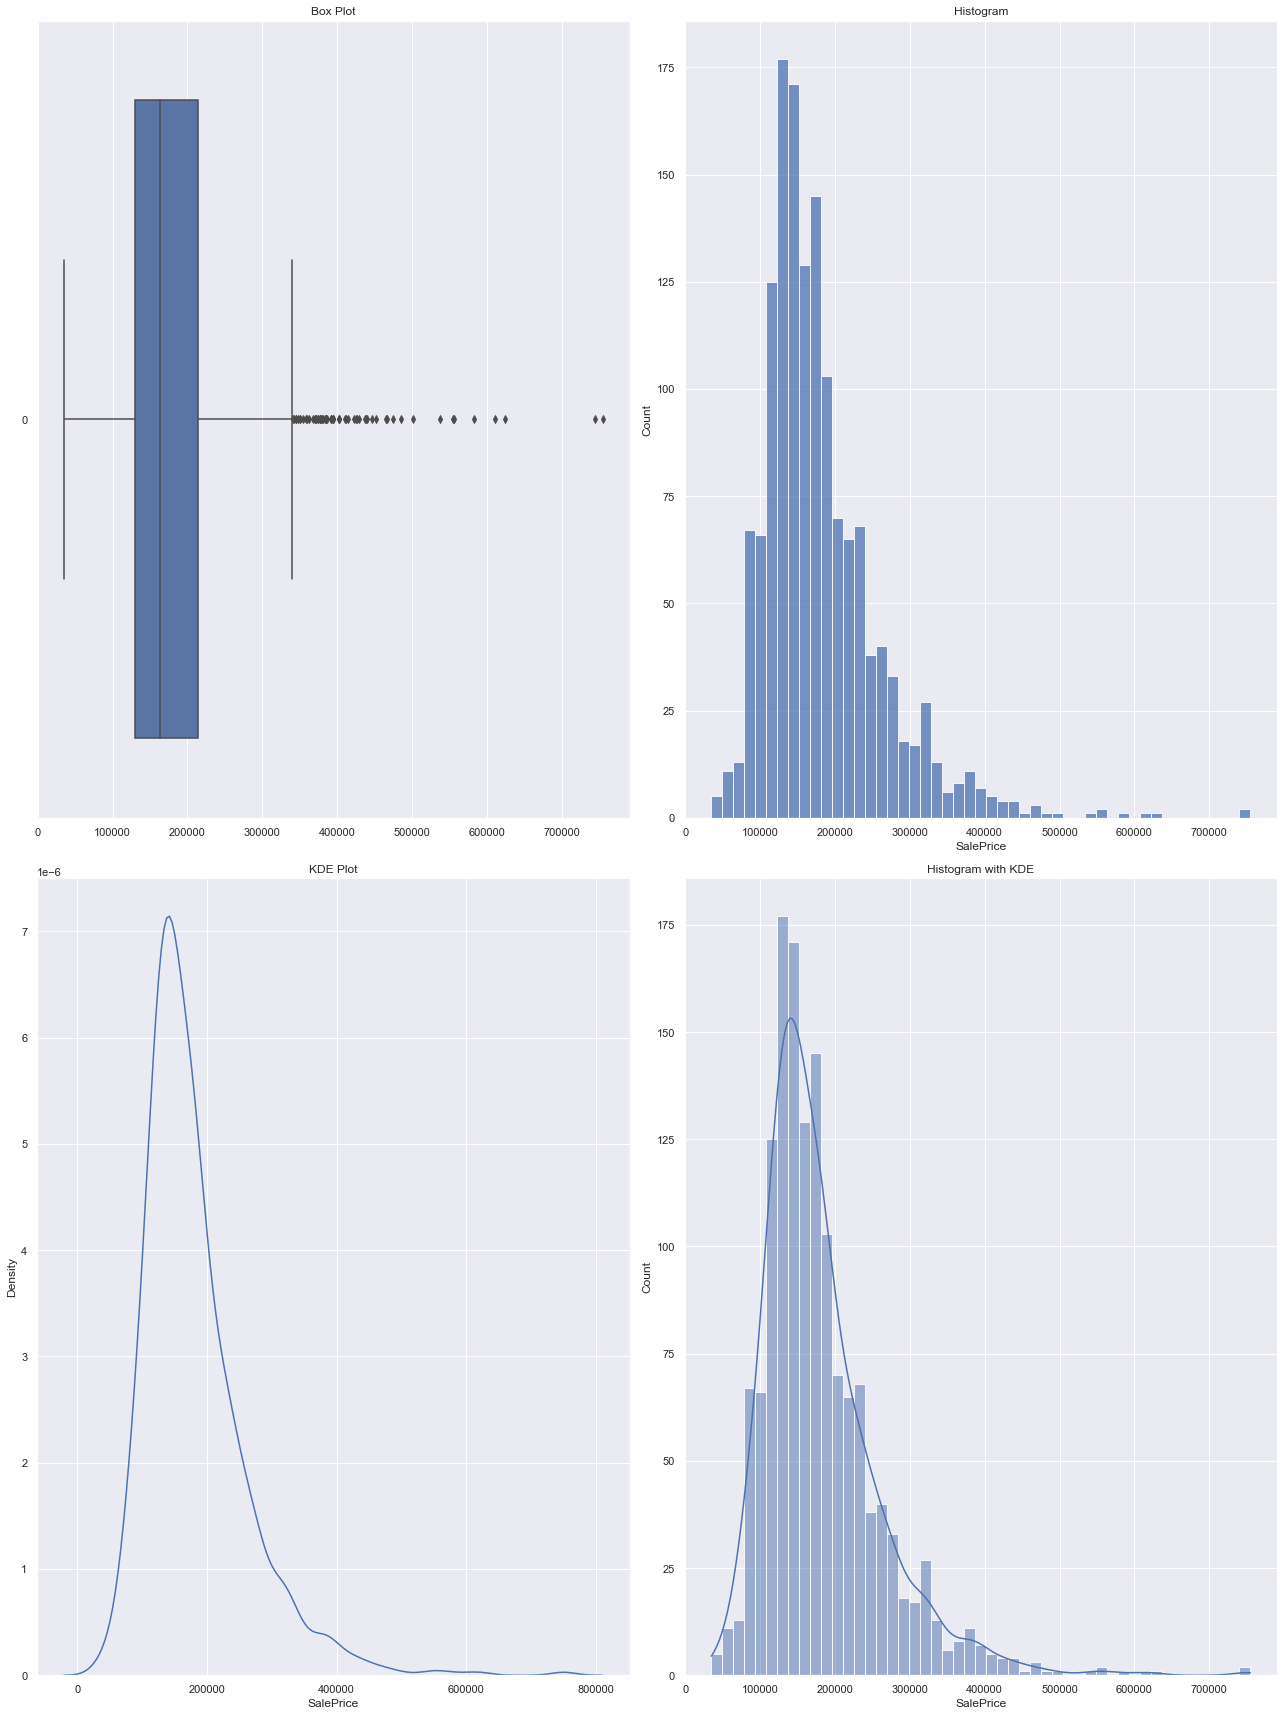

In [19]:
# Visualize the summary statistics and distribution of SalePrice using standard Box-Plot, Histogram, KDE.

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(18,24))
plt.subplots_adjust(hspace = 0.5)

# Box Plot
sns.boxplot(data = cleaned_int_df['SalePrice'], orient = 'h', ax = axes[0, 0])
axes[0,0].set_title('Box Plot')

# Histogram (TAKE NOTE HISTOGRAM NO ORIENT ATTRIBUTE)
sns.histplot(data = cleaned_int_df['SalePrice'], ax = axes[0, 1], kde = False)
axes[0,1].set_title('Histogram')
                    
# KDE Plot (TAKE NOTE KDE NO ORIENT ATTRIBUTE)
sns.kdeplot(data = cleaned_int_df['SalePrice'], ax = axes[1, 0])
axes[1,0].set_title('KDE Plot')

# Combined Histogram and KDE Plot
sns.histplot(data = cleaned_int_df['SalePrice'], ax = axes[1, 1], kde = True)
axes[1,1].set_title('Histogram with KDE')

plt.tight_layout()
plt.show()

In [20]:
# Find the Summary Statistics (Mean, Median, Quartiles etc) of LotArea from the Numeric DataFrame.

summary_statistics_lotarea = traindata['LotArea'].describe()
print(summary_statistics_lotarea)

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


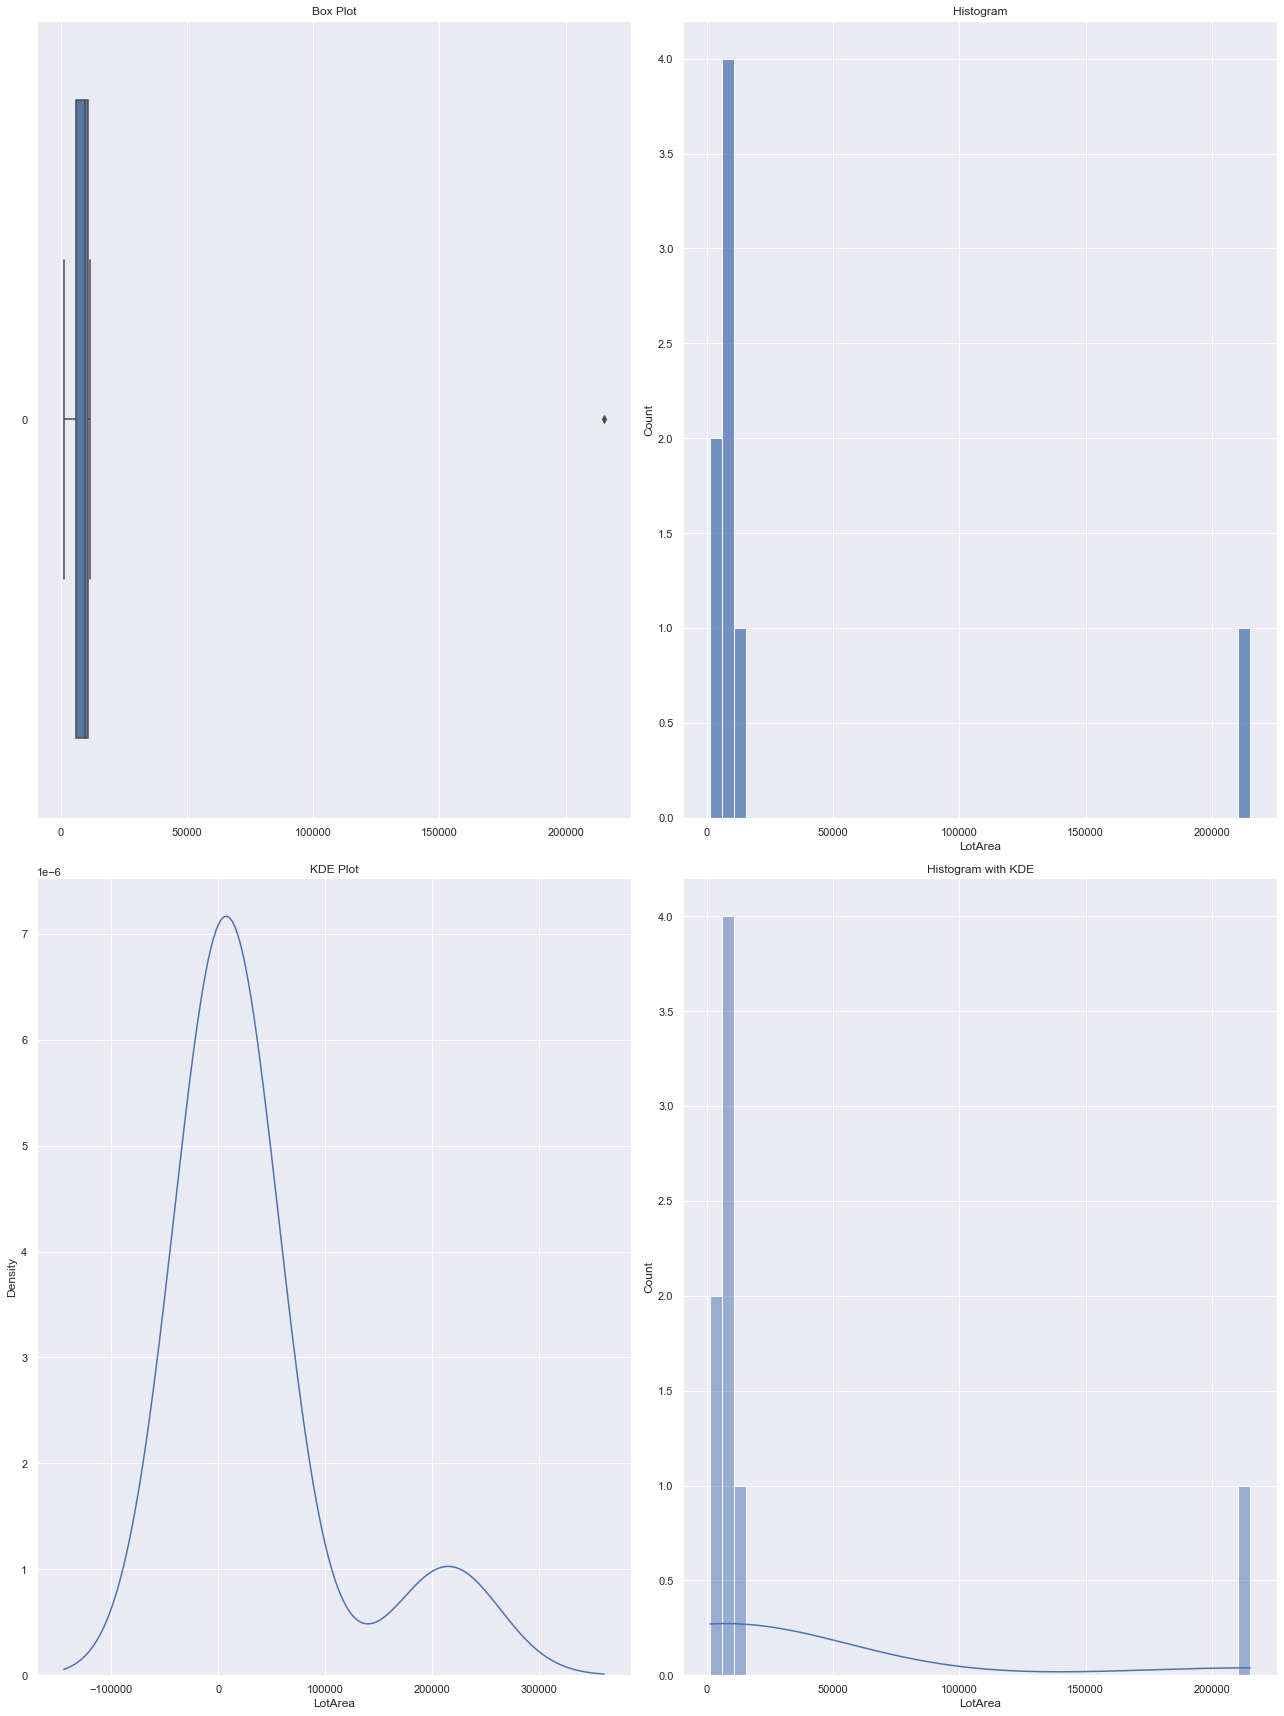

In [21]:
# Visualize the summary statistics and distribution of LotArea using standard Box-Plot, Histogram, KDE.

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(18,24))
plt.subplots_adjust(hspace = 0.5)

# Box plot
sb.boxplot(data = summary_statistics_lotarea, orient = 'h', ax = axes[0, 0])
axes[0,0].set_title('Box Plot')

# Histogram (TAKE NOTE HISTOGRAM NO ORIENT ATTRIBUTE)
sb.histplot(data = summary_statistics_lotarea, ax = axes[0, 1], kde = False)
axes[0,1].set_title('Histogram')

# KDE Plot (TAKE NOTE KDE NO ORIENT ATTRIBUTE)
sb.kdeplot(data = summary_statistics_lotarea, ax = axes[1, 0])
axes[1,0].set_title('KDE Plot')

# Combined Histogram and KDE Plot
sb.histplot(data = summary_statistics_lotarea, ax = axes[1, 1], kde = True)
axes[1,1].set_title('Histogram with KDE')

plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Scatter Plot of SalePrice vs LotArea')

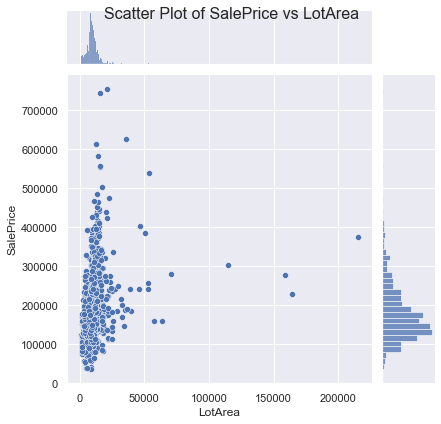

In [29]:
# Plot SalePrice (y-axis) vs LotArea (x-axis) using jointplot, and check the Correlation between the two
# Does not create new DataFrame
sns.set()
sns.jointplot(x='LotArea', y='SalePrice', data=cleaned_int_df, kind='scatter')
plt.suptitle('Scatter Plot of SalePrice vs LotArea', fontsize=16)

In [32]:
# Create a joint dataframe by concatenating the two variables

lotarea = pd.DataFrame(cleaned_int_df['LotArea'])
saleprice = pd.DataFrame(cleaned_int_df['SalePrice'])


jointDF = pd.concat([lotarea, saleprice], axis = 1).reindex(lotarea.index)
jointDF

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


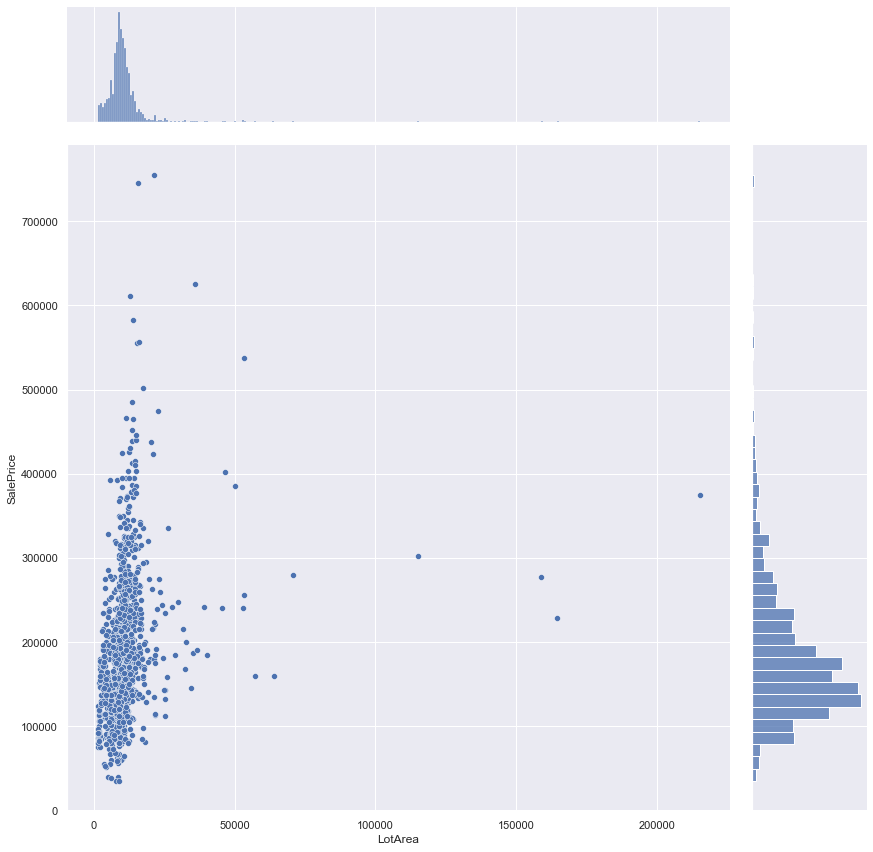

In [33]:
# Draw jointplot of the two variables in the joined dataframe
sns.jointplot(data = jointDF, x = "LotArea", y = "SalePrice", height = 12)

In [34]:
# Calculate the correlation between the two columns/variables
jointDF.corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


<AxesSubplot:>

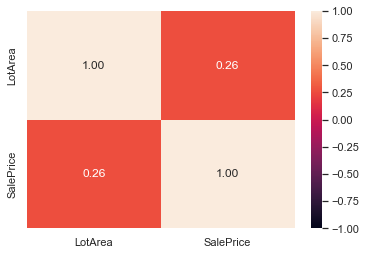

In [35]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")